In [1]:
### Download data from https://drive.google.com/file/d/1ZMCY9Y3FTv-m0QFyBBwrvqaSuS5pAc3l/view?pli=1

from suncasa import dspec as ds
import matplotlib.pyplot as plt

## define the visbility data file
msfile = 'IDB20170821201800-202300.4s.slfcaled.ms' 

## define the output filename of the dynamic spectrum 
specfile = msfile + '.dspec.npz'  

## select relatively short baselines within a length (here I use 0.15~0.5km), 
## and take a median cross all of them (with the domedian parameter)
## alternatively, you can use the "bl" parameter to select individual baseline(s)
uvrange = '0.15~0.5km'

## this step generates a dynamic spectrum and saves it to specfile
d = ds.Dspec(msfile, specfile=specfile, uvrange=uvrange,usetbtool=False, domedian=True,verbose=True)
## dspec is a Python dictionary that contains the resulting dynamic spectrum. 
## A copy is saved in "specfile" as a numpy npz file.
## Other optional parameters are available for more selection criteria 
## such as frequency range ("spw"), and time range ("timeran")
## Use "ds.get_dspec?" to see more options

Splitting selected data...
Splitting selected data...


2023-01-09 03:33:40	INFO	SubMS::parseColumnNames()	Using DATA column.
2023-01-09 03:33:41	INFO	SubMS::makeSelection()	93000 out of 316200 rows are going to be considered due to the selection criteria.


Concatenating visibility data spw by spw
A total of 31 spws to fill
filling up spw #0: 0
shape of this spw (4, 8, 40, 75)
filling up spw #1: 1
shape of this spw (4, 7, 40, 75)
filling up spw #2: 10
shape of this spw (4, 6, 40, 75)
filling up spw #3: 11
shape of this spw (4, 5, 40, 75)
filling up spw #4: 12
shape of this spw (4, 4, 40, 75)
filling up spw #5: 13
shape of this spw (4, 4, 40, 75)
filling up spw #6: 14
shape of this spw (4, 4, 40, 75)
filling up spw #7: 15
shape of this spw (4, 4, 40, 75)
filling up spw #8: 16
shape of this spw (4, 4, 40, 75)
filling up spw #9: 17
shape of this spw (4, 4, 40, 75)
filling up spw #10: 18
shape of this spw (4, 4, 40, 75)
filling up spw #11: 19
shape of this spw (4, 4, 40, 75)
filling up spw #12: 2
shape of this spw (4, 4, 40, 75)
filling up spw #13: 20
shape of this spw (4, 4, 40, 75)
filling up spw #14: 21
shape of this spw (4, 4, 40, 75)
filling up spw #15: 22
shape of this spw (4, 4, 40, 75)
filling up spw #16: 23
shape of this spw (4, 4, 4

Here I have selected some small baselines and taken the median of their amplitudes to obtain the dynamic spectrum. I have selected baselines using the parameter 'uvrange'. You can also choose a few baselines. If you want to do that follow this syntax:

d = ds.Dspec(msfile, specfile=specfile, bl='1&&2;2&&3;3&&7',usetbtool=False, domedian=True,verbose=True)

You can also choose to generate the dynamic spectrum for a selected timerange and frequency range. Note that the frequency range can only be given by specifying the spw numbers like '5~25'. This will select spw 5 to spw 25.

In [4]:
ds.Dspec?

Init signature:
ds.Dspec(
    fname=None,
    specfile=None,
    bl='',
    uvrange='',
    field='',
    scan='',
    datacolumn='data',
    domedian=False,
    timeran=None,
    spw=None,
    timebin='0s',
    regridfreq=False,
    fillnan=None,
    verbose=False,
    usetbtool=True,
    ds_normalised=False,
)
Docstring:      <no docstring>
File:           ~/envs/default_python/lib/python3.8/site-packages/suncasa-1.0.0-py3.8.egg/suncasa/dspec/dspec.py
Type:           type
Subclasses:     


ploting dynamic spectrum...


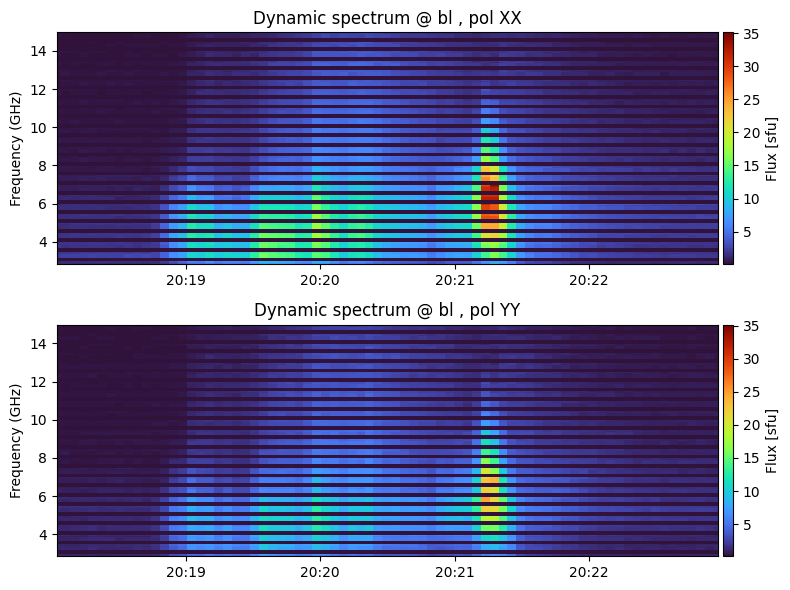

In [2]:
## define the polarizations to show (here I use XX and YY)
pol='XXYY'
## The following command displays the resulting cross-power dynamic spectrum
fig=d.plot(pol=pol)

You can set pol to 'XX','YY', 'I' or 'V'. Note that at this point stokes V imaging for EOVSA data has not been standarised yet.

Now we shall create quicklook images for this event. We will use the task "qlookplot" for this purpose. The resulting radio image is a 4-D datacube (in solar X-pos, Y-pos, frequency, and polarization), which is, by default, saved as a fits file msfile + '.outim.image.fits' under your working directory. The name of the output fits file can be specified using the "outfits" parameter. In this example, we combine all selected frequencies (specified in keyword "spw") into one image (i.e., multi-frequency synthesis). Therefore the third axis only has one plane. The fourth axis contains polarization.

For 2019 and later, these gaps would not be there.

In [6]:
d.plot?

Signature:
d.plot(
    pol='I',
    vmin=None,
    vmax=None,
    norm=None,
    cmap='turbo',
    timerange=None,
    freqrange=None,
    ignore_gaps=True,
)
Docstring:
timerange: format: ['2021-05-07T18:00:00','2021-05-07T19:00:00']
freqrange: format: [1.,18.] in GHz
File:      ~/envs/default_python/lib/python3.8/site-packages/suncasa-1.0.0-py3.8.egg/suncasa/dspec/dspec.py
Type:      method


ploting dynamic spectrum...


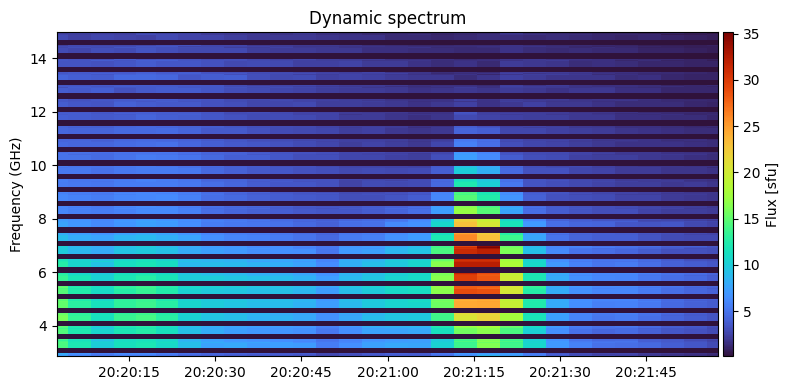

In [3]:
pol='XX'

timerange=['2017-08-21T20:20:00','2017-08-21T20:22:00']

## The following command displays the resulting cross-power dynamic spectrum
fig=d.plot(pol=pol,timerange=timerange)

spw is ['5GHz~6GHz']
plot the dynamic spectrum in pol XX


Files Downloaded: 100%|█████████████████████████| 4/4 [00:00<00:00,  4.36file/s]


This is EOVSA data
do clean for 2017/08/21/20:21:10~2017/08/21/20:21:18 in spw 5GHz~6GHz stokes XX
Original phasecenter: 2.63270378993855920.20813385517360355
use phasecenter: J2000 2.6327037899385592rad 0.20813385517360355rad
use restoringbeam 12.362670530001207arcsec


2023-01-09 03:34:15	INFO	tclean::::casa	##########################################
2023-01-09 03:34:15	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:34:15	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='5GHz~6GHz', timerange='2017/08/21/20:21:10~2017/08/21/20:21:18', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./IDB20170821201800-202300.4s.slfcaled.ms.outim', imsize=[512], cell=['5.0arcsec'], phasecenter='J2000 2.6327037899385592rad 0.20813385517360355rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False, cfcache='', usepointing=False, computepastep=360.0, r

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image


2023-01-09 03:34:17	INFO	ImageMetaData::summary	
2023-01-09 03:34:17	INFO	ImageMetaData::summary+	Image name       : IDB20170821201800-202300.4s.slfcaled.ms.outim.image.pbcor
2023-01-09 03:34:17	INFO	ImageMetaData::summary+	Object name      : Sun
2023-01-09 03:34:17	INFO	ImageMetaData::summary+	Image type       : PagedImage
2023-01-09 03:34:17	INFO	ImageMetaData::summary+	Image quantity   : Intensity
2023-01-09 03:34:17	INFO	ImageMetaData::summary+	Pixel mask(s)    : mask0
2023-01-09 03:34:17	INFO	ImageMetaData::summary+	Region(s)        : None
2023-01-09 03:34:17	INFO	ImageMetaData::summary+	Image units      : Jy/beam
2023-01-09 03:34:17	INFO	ImageMetaData::summary+	Restoring Beam   : 12.3627 arcsec, 12.3627 arcsec, 0 deg
2023-01-09 03:34:17	INFO	ImageMetaData::summary	
2023-01-09 03:34:17	INFO	ImageMetaData::summary+	Direction reference : J2000
2023-01-09 03:34:17	INFO	ImageMetaData::summary+	Spectral  reference : LSRK
2023-01-09 03:34:17	INFO	ImageMetaData::summary+	Velocity  type  

fits file EOVSA_20170821T202113.999999.image.fits selected


'EOVSA_20170821T202113.999999.image.fits'

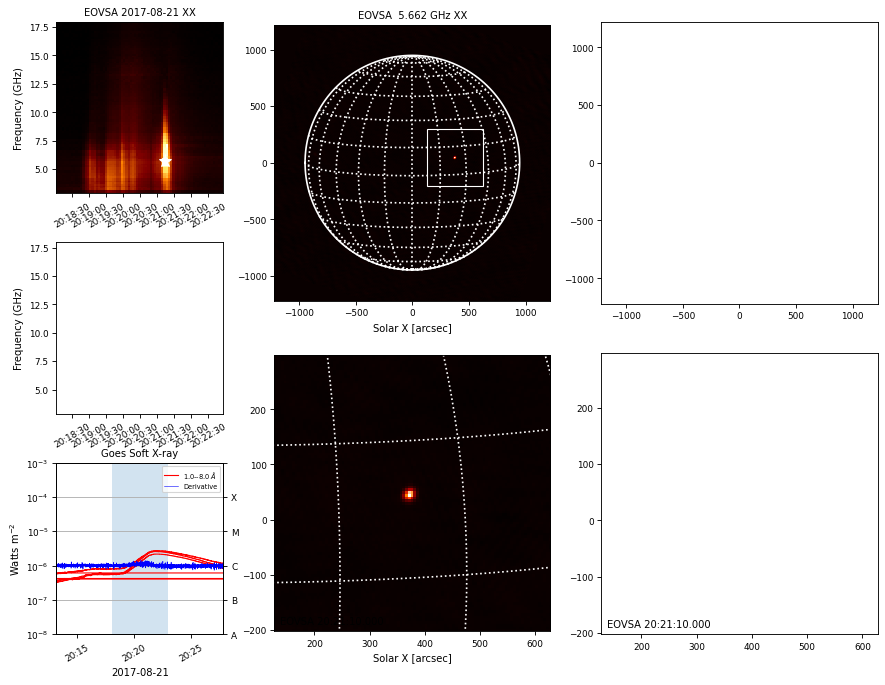

In [4]:
## in SunCASA
from suncasa.utils import qlookplot as ql

msfile = 'IDB20170821201800-202300.4s.slfcaled.ms'

## (Optional) Supply the npz file of the dynamic spectrum from previous step. 
## If not provided, the program will generate a new one from the visibility.
specfile = msfile + '.dspec.npz'  

## set the time interval
timerange = '20:21:10~20:21:18'  

## Set the frequency range for averaging
spw = '5GHz~6GHz' 

## select stokes XX
stokes = 'XX'

## turn off AIA image plotting, default is True
plotaia = False 

ql.qlookplot(vis=msfile, specfile=specfile, timerange=timerange, spw=spw, \
    stokes=stokes, plotaia=plotaia)

The empty panels are there as we only selected one polarization for imaging/spectroscopy. Feel free to explore the different parameters of qlookplot.
One interesting parameter to look into: xycen: center of the image in helioprojective coordinates (HPLN/HPLT), in arcseconds. Example: [900, -150.]
This image can be directly loaded into Sunpy/IDL using standard procedures. Here I show how we can load and plot the image using SunPy.

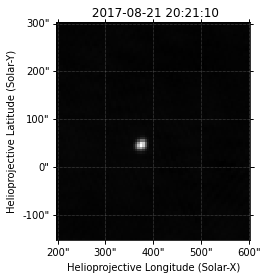

In [5]:
from sunpy import map as smap
from astropy.coordinates import SkyCoord
import astropy.units as u

eofile='EOVSA_20170821T202113.999999.image.fits'
eomap=smap.Map(eofile)

bottom_left=SkyCoord(200*u.arcsec,-150*u.arcsec,frame=eomap.coordinate_frame)
top_right=SkyCoord(600*u.arcsec,300*u.arcsec,frame=eomap.coordinate_frame)

eo_submap=eomap.submap(bottom_left=bottom_left,top_right=top_right)

fig=plt.figure()
ax=fig.add_subplot(111,projection=eo_submap)
eo_submap.plot(cmap='gray')
plt.show()


You can also use qlookplot to directly overlay the rasio contours on AIA images

spw is ['5GHz~6GHz']
plot the dynamic spectrum in pol XX


Files Downloaded: 100%|█████████████████████████| 4/4 [00:00<00:00,  4.53file/s]


This is EOVSA data
do clean for 2017/08/21/20:21:10~2017/08/21/20:21:18 in spw 5GHz~6GHz stokes XX
Original phasecenter: 2.63270378993855920.20813385517360355
use phasecenter: J2000 2.6327037899385592rad 0.20813385517360355rad
use restoringbeam 12.362670530001207arcsec


2023-01-09 03:34:50	INFO	tclean::::casa	##########################################
2023-01-09 03:34:50	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:34:50	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='5GHz~6GHz', timerange='2017/08/21/20:21:10~2017/08/21/20:21:18', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./IDB20170821201800-202300.4s.slfcaled.ms.outim', imsize=[512], cell=['5.0arcsec'], phasecenter='J2000 2.6327037899385592rad 0.20813385517360355rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False, cfcache='', usepointing=False, computepastep=360.0, r

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image


2023-01-09 03:34:52	INFO	ImageMetaData::summary	
2023-01-09 03:34:52	INFO	ImageMetaData::summary+	Image name       : IDB20170821201800-202300.4s.slfcaled.ms.outim.image.pbcor
2023-01-09 03:34:52	INFO	ImageMetaData::summary+	Object name      : Sun
2023-01-09 03:34:52	INFO	ImageMetaData::summary+	Image type       : PagedImage
2023-01-09 03:34:52	INFO	ImageMetaData::summary+	Image quantity   : Intensity
2023-01-09 03:34:52	INFO	ImageMetaData::summary+	Pixel mask(s)    : mask0
2023-01-09 03:34:52	INFO	ImageMetaData::summary+	Region(s)        : None
2023-01-09 03:34:52	INFO	ImageMetaData::summary+	Image units      : Jy/beam
2023-01-09 03:34:52	INFO	ImageMetaData::summary+	Restoring Beam   : 12.3627 arcsec, 12.3627 arcsec, 0 deg
2023-01-09 03:34:52	INFO	ImageMetaData::summary	
2023-01-09 03:34:52	INFO	ImageMetaData::summary+	Direction reference : J2000
2023-01-09 03:34:52	INFO	ImageMetaData::summary+	Spectral  reference : LSRK
2023-01-09 03:34:52	INFO	ImageMetaData::summary+	Velocity  type  

fits file EOVSA_20170821T202113.999999.image.fits selected


'EOVSA_20170821T202113.999999.image.fits'

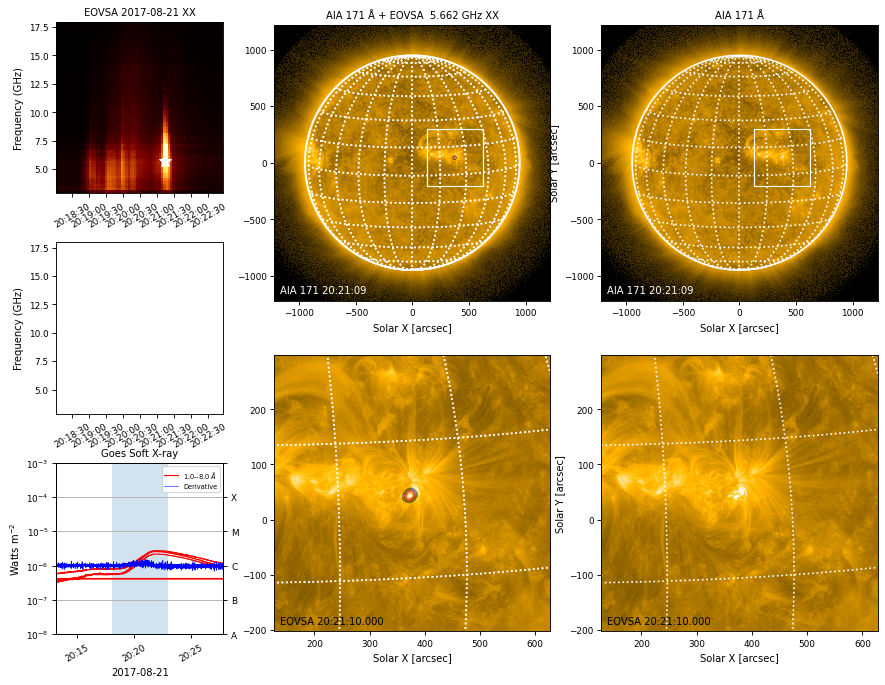

In [6]:
ql.qlookplot(vis=msfile, specfile=specfile, timerange=timerange, spw=spw, \
    stokes=stokes, plotaia=True)  ## Note that now we have set plotaia= True

By default, qlookplot produces a full sun radio image (512x512 with a pixel size of 5"). If you know where the radio source is (e.g., from the previous full-Sun imaging), you can make a partial solar image around the source by specifying the image center ("xycen"), pixel scale ("cell"), and image field of view ("fov"). Here we show an example that images a 8-s interval around 20:21:14 UT using multi-frequency synthesis in 12-14 GHz and a smaller restoring beam. The microwave source is show to bifurcate into two components, which correspond pretty well with the double flare ribbons in SDO/AIA. 

spw is ['12GHz~14GHz']
plot the dynamic spectrum in pol XX


Files Downloaded: 100%|█████████████████████████| 4/4 [00:00<00:00,  4.35file/s]


This is EOVSA data
do clean for 2017/08/21/20:21:10~2017/08/21/20:21:18 in spw 12GHz~14GHz stokes XX
Original phasecenter: 2.63270378993855920.20813385517360355
use phasecenter: J2000 2.6310088197828683rad 0.20891007976188247rad
use restoringbeam ['6arcsec']


2023-01-09 03:35:17	INFO	tclean::::casa	##########################################
2023-01-09 03:35:17	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:35:17	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='12GHz~14GHz', timerange='2017/08/21/20:21:10~2017/08/21/20:21:18', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./IDB20170821201800-202300.4s.slfcaled.ms.outim', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.6310088197828683rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False, cfcache='', usepointing=False, computepastep=360.0,

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image


2023-01-09 03:35:18	INFO	ImageMetaData::summary	
2023-01-09 03:35:18	INFO	ImageMetaData::summary+	Image name       : IDB20170821201800-202300.4s.slfcaled.ms.outim.image.pbcor
2023-01-09 03:35:18	INFO	ImageMetaData::summary+	Object name      : Sun
2023-01-09 03:35:18	INFO	ImageMetaData::summary+	Image type       : PagedImage
2023-01-09 03:35:18	INFO	ImageMetaData::summary+	Image quantity   : Intensity
2023-01-09 03:35:18	INFO	ImageMetaData::summary+	Pixel mask(s)    : mask0
2023-01-09 03:35:18	INFO	ImageMetaData::summary+	Region(s)        : None
2023-01-09 03:35:18	INFO	ImageMetaData::summary+	Image units      : Jy/beam
2023-01-09 03:35:18	INFO	ImageMetaData::summary+	Restoring Beam   : 6 arcsec, 6 arcsec, 0 deg
2023-01-09 03:35:18	INFO	ImageMetaData::summary	
2023-01-09 03:35:18	INFO	ImageMetaData::summary+	Direction reference : J2000
2023-01-09 03:35:18	INFO	ImageMetaData::summary+	Spectral  reference : LSRK
2023-01-09 03:35:18	INFO	ImageMetaData::summary+	Velocity  type      : RADIO


fits file EOVSA_20170821T202113.999999.image.fits selected


'EOVSA_20170821T202113.999999.image.fits'

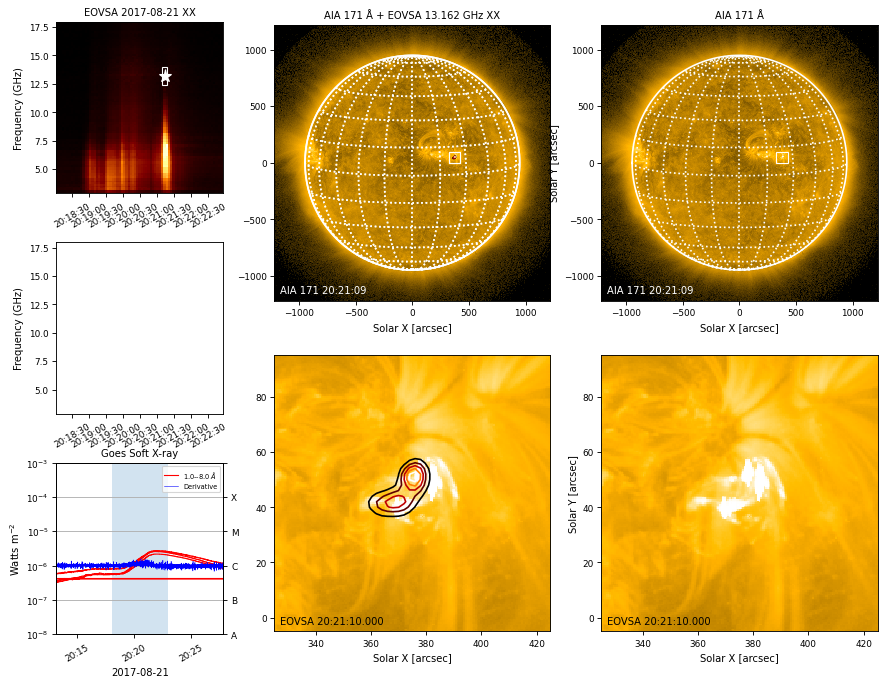

In [7]:
## in SunCASA
xycen = [375, 45]  ## image center for clean in solar X-Y in arcsec
cell=['2.0arcsec'] ## pixel scale
imsize=[128]   ## number of pixels in X and Y. If only one value is provided, NX = NY
fov = [100,100]  ## field of view of the zoomed-in panels in unit of arcsec; only used for visualization
                
spw='12GHz~14GHz'
ql.qlookplot(vis=msfile, specfile=specfile, timerange='20:21:10~20:21:18', \
              spw=spw, stokes='XX', restoringbeam=['6arcsec'],\
              imsize=imsize,cell=cell,xycen=xycen,fov=fov,calpha=1.0)

Next, we will make images for every single spectral window in this data set (from spw 1 to 30, spw 0 is in the visibility data, but is not calibrated for this event). 

spw is ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
plot the dynamic spectrum in pol XX


Files Downloaded: 100%|█████████████████████████| 4/4 [00:00<00:00,  6.55file/s]


This is EOVSA data
Original phasecenter: 2.63270378993855920.20813385517360355
use phasecenter: J2000 2.6310088197828683rad 0.20891007976188247rad
do clean for 2017/08/21/20:21:10~2017/08/21/20:21:18 stokes XX


Processing spectral window:   0%|                        | 0/30 [00:00<?, ?it/s]2023-01-09 03:35:49	INFO	tclean::::casa	##########################################
2023-01-09 03:35:49	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:35:49	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='1', timerange='2017/08/21/20:21:10~2017/08/21/20:21:18', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./IDB20170821201800-202300.4s.slfcaled.ms_s01.outim', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.6310088197828683rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
Warnin

2023-01-09 03:36:52	INFO	ImageMetaData::summary	
2023-01-09 03:36:52	INFO	ImageMetaData::summary+	Image name       : IDB20170821201800-202300.4s.slfcaled.ms_s01.outim.image.pbcor
2023-01-09 03:36:52	INFO	ImageMetaData::summary+	Object name      : Sun
2023-01-09 03:36:52	INFO	ImageMetaData::summary+	Image type       : PagedImage
2023-01-09 03:36:52	INFO	ImageMetaData::summary+	Image quantity   : Intensity
2023-01-09 03:36:52	INFO	ImageMetaData::summary+	Pixel mask(s)    : mask0
2023-01-09 03:36:52	INFO	ImageMetaData::summary+	Region(s)        : None
2023-01-09 03:36:52	INFO	ImageMetaData::summary+	Image units      : Jy/beam
2023-01-09 03:36:52	INFO	ImageMetaData::summary+	Restoring Beam   : 20.5 arcsec, 20.5 arcsec, 0 deg
2023-01-09 03:36:52	INFO	ImageMetaData::summary	
2023-01-09 03:36:52	INFO	ImageMetaData::summary+	Direction reference : J2000
2023-01-09 03:36:52	INFO	ImageMetaData::summary+	Spectral  reference : LSRK
2023-01-09 03:36:52	INFO	ImageMetaData::summary+	Velocity  type    

'EOVSA_20170821T202113.999999.image.fits'

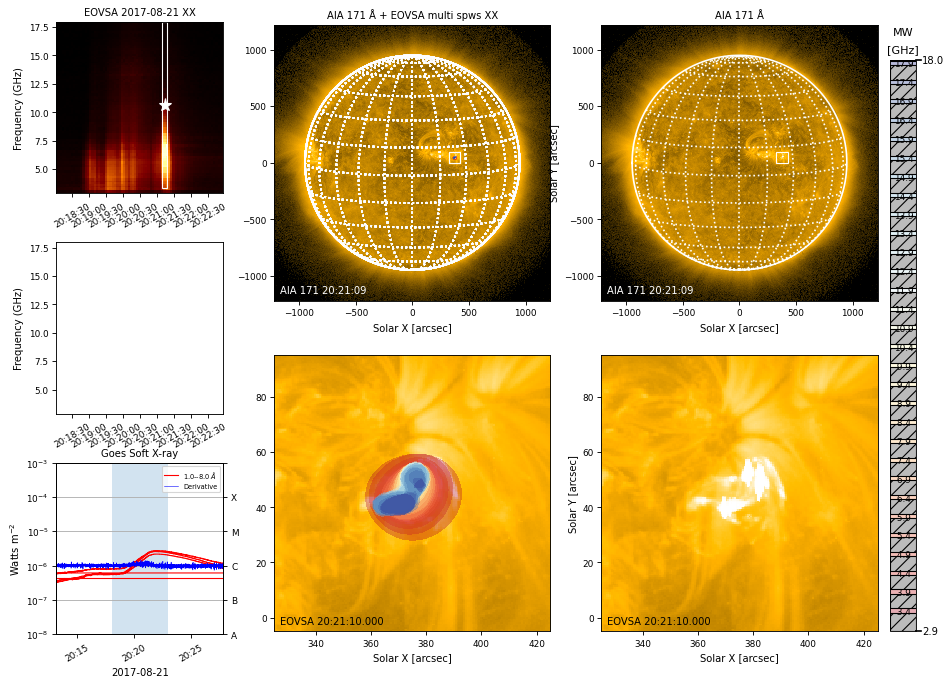

In [8]:
## in SunCASA
xycen = [375, 45]  ## image center for clean in solar X-Y in arcsec
cell=['2.0arcsec'] ## pixel size
imsize=[128]   ## x and y image size in pixels. 
fov = [100,100]  ## field of view of the zoomed-in panels in unit of arcsec
spw = ['{}'.format(s) for s in range(1,31)]
clevels = [0.3, 1.0]  ## contour levels to fill in between.
calpha=0.35  ## now tune down the alpha
#restoringbeam=['50arcsec']   #### Here we are making images at multiple spws. In this case the restoring beam provided is for 1.6 GHz.
 #                            #### They are scaled as 1/freq for each spw.
ql.qlookplot(vis=msfile, specfile=specfile, timerange=timerange, spw=spw, stokes=stokes, \
            imsize=imsize,cell=cell, xycen=xycen,fov=fov,clevels=clevels,calpha=calpha)

Now let us try to create a movie of the multifrequency images.

In [9]:
# In SunCASA
msfile = 'IDB20170821201800-202300.4s.slfcaled.ms'
specfile = msfile + '.dspec.npz' 
## set the time interval
timerange = '2017/08/21/20:21:05~2017/08/21/20:21:18'
## Bin width for time averaging
twidth = 1
## frequency range
spw = ['1','5','12','20','30']
## image center for clean in solar X-Y in arcsec
xycen = [375, 45]
## number of pixels in X and Y. If only one value is provided, NX = NY
imsize = [128]
## field of view of the zoomed-in panels in unit of arcsec
fov = [100., 100.]
## pixel scale
cell = ['2.0arcsec']
## select stokes XX
stokes = 'XX'
restoringbeam=['50arcsec']
## set True if make a movie
mkmovie = True
movieformat='mp4'
## set True if generate compressed fits
docompress = True
#### ---- Control knobs for AIA plotting ---- ####
## set True if plot AIA images as the background
plotaia = True
## provide the path to the directory where the AIA fits files are located. Otherwise, set it to be ''
aiadir = ''
## AIA passband. The options are [171,131,304,335,211,193,94,1600,1700]
aiawave = 171
## numbers of CPU threads for computing


ql.qlookplot(vis=msfile, specfile=specfile, timerange=timerange, spw=spw, 
          xycen=xycen, imsize=imsize, fov=fov, cell=cell, restoringbeam=restoringbeam,
          plotaia=plotaia, aiadir=aiadir, aiawave=aiawave, movieformat=movieformat,
          mkmovie=mkmovie, twidth=twidth, docompress=docompress, stokes=stokes)

spw is ['1', '5', '12', '20', '30']
This is EOVSA data
use phasecenter: J2000 2.631008819722392rad 0.20891007976188247rad


2023-01-09 03:38:07	INFO	ptclean6::::casa	##########################################
2023-01-09 03:38:07	INFO	ptclean6::::casa	##### Begin Task: ptclean6           #####
2023-01-09 03:38:07	INFO	ptclean6::::casa	ptclean6( vis='IDB20170821201800-202300.4s.slfcaled.ms', imageprefix='./qlookfits//', imagesuffix='.spw01', ncpu=1, twidth=1, doreg=True, usephacenter=True, reftime='', toTb=True, sclfactor=1.0, subregion='', docompress=True, overwrite=True, selectdata=True, field='', spw='1', timerange='2017/08/21/20:21:05~2017/08/21/20:21:18', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.631008819722392rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1,

First time pixel: 2017-08-21T20:21:05.500
Last time pixel: 2017-08-21T20:21:17.500
4 images to clean...
Perform clean in single process ...
cleaning timerange: 2017/08/21/20:21:03.500~2017/08/21/20:21:07.500


2023-01-09 03:38:08	INFO	ptclean6::::casa	Perform clean in single process ...
2023-01-09 03:38:08	INFO	tclean::::casa	##########################################
2023-01-09 03:38:08	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:38:08	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='1', timerange='2017/08/21/20:21:03.500~2017/08/21/20:21:07.500', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./qlookfits//20170821T202103.500.spw01', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.631008819722392rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, co

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:07.500~2017/08/21/20:21:11.500


2023-01-09 03:38:09	INFO	ImageRotator::rotate	Rotating DirectionCoordinate holding axes [0, 1]
2023-01-09 03:38:09	INFO	CasacRegionManager::fromBCS	No directional region specified. Using full positional plane.
2023-01-09 03:38:09	INFO	CasacRegionManager::fromBCS	Using all spectral channels.
2023-01-09 03:38:09	INFO	CasacRegionManager::fromBCS	Using polarizations ALL
2023-01-09 03:38:09	INFO	ImageMaskAttacher::makeMask	Created and initialized mask `mask0'
2023-01-09 03:38:09	INFO	ImageMaskAttacher::makeMask	Created mask `mask0'
2023-01-09 03:38:09	INFO	image::_casaQuantityFromVar 	Using position angle rotation -18.2321deg
2023-01-09 03:38:09	INFO	ImageFactory::toFITS	Applying mask of name 'mask0'
2023-01-09 03:38:09	INFO	ImageFitsConverter::ImageHeaderToFITS 	Truncating miscinfo field useweightimage to useweigh
2023-01-09 03:38:09	INFO	ImageMetaData::summary	
2023-01-09 03:38:09	INFO	ImageMetaData::summary+	Image name       : 20170821T202103.500.spw01.image
2023-01-09 03:38:09	INFO	Imag

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:11.500~2017/08/21/20:21:15.500


2023-01-09 03:38:11	INFO	tclean::::casa	##########################################
2023-01-09 03:38:11	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:38:11	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='1', timerange='2017/08/21/20:21:11.500~2017/08/21/20:21:15.500', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./qlookfits//20170821T202111.500.spw01', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.631008819722392rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False, cfcache='', usepointing=False, computepastep=360.0, rotatepaste

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:15.500~2017/08/21/20:21:19.500


2023-01-09 03:38:12	INFO	ImageMetaData::summary	
2023-01-09 03:38:12	INFO	ImageMetaData::summary+	Direction reference : J2000
2023-01-09 03:38:12	INFO	ImageMetaData::summary+	Spectral  reference : LSRK
2023-01-09 03:38:12	INFO	ImageMetaData::summary+	Velocity  type      : RADIO
2023-01-09 03:38:12	INFO	ImageMetaData::summary+	Rest frequency      : 3.41257e+09 Hz
2023-01-09 03:38:12	INFO	ImageMetaData::summary+	Pointing center     :  10:02:58.968296  +11.58.10.797125
2023-01-09 03:38:12	INFO	ImageMetaData::summary+	Telescope           : EOVSA
2023-01-09 03:38:12	INFO	ImageMetaData::summary+	Observer            : EOVSA team
2023-01-09 03:38:12	INFO	ImageMetaData::summary+	Date observation    : 2017/08/21/20:21:13.500005
2023-01-09 03:38:12	INFO	ImageMetaData::summary+	
2023-01-09 03:38:12	INFO	ImageMetaData::summary+	Axis Coord Type      Name             Proj Shape Tile   Coord value at pixel        Coord incr Units
2023-01-09 03:38:12	INFO	ImageMetaData::summary+	-----------------------

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
It took 5.018514 secs to complete


2023-01-09 03:38:13	INFO	ImageRotator::rotate	Rotating DirectionCoordinate holding axes [0, 1]
2023-01-09 03:38:13	INFO	CasacRegionManager::fromBCS	No directional region specified. Using full positional plane.
2023-01-09 03:38:13	INFO	CasacRegionManager::fromBCS	Using all spectral channels.
2023-01-09 03:38:13	INFO	CasacRegionManager::fromBCS	Using polarizations ALL
2023-01-09 03:38:13	INFO	ImageMaskAttacher::makeMask	Created and initialized mask `mask0'
2023-01-09 03:38:13	INFO	ImageMaskAttacher::makeMask	Created mask `mask0'
2023-01-09 03:38:13	INFO	image::_casaQuantityFromVar 	Using position angle rotation -18.2321deg
2023-01-09 03:38:13	INFO	ImageFactory::toFITS	Applying mask of name 'mask0'
2023-01-09 03:38:13	INFO	ImageFitsConverter::ImageHeaderToFITS 	Truncating miscinfo field useweightimage to useweigh
2023-01-09 03:38:13	INFO	ImageMetaData::summary	
2023-01-09 03:38:13	INFO	ImageMetaData::summary+	Image name       : 20170821T202115.500.spw01.image
2023-01-09 03:38:13	INFO	Imag

First time pixel: 2017-08-21T20:21:05.500
Last time pixel: 2017-08-21T20:21:17.500
4 images to clean...
Perform clean in single process ...
cleaning timerange: 2017/08/21/20:21:03.500~2017/08/21/20:21:07.500


2023-01-09 03:38:14	INFO	ptclean6::::casa	Perform clean in single process ...
2023-01-09 03:38:14	INFO	tclean::::casa	##########################################
2023-01-09 03:38:14	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:38:14	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='5', timerange='2017/08/21/20:21:03.500~2017/08/21/20:21:07.500', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./qlookfits//20170821T202103.500.spw05', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.631008819722392rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, co

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:07.500~2017/08/21/20:21:11.500


2023-01-09 03:38:16	INFO	SynthesisImagerVi2::defineImage 	Define image coordinates for [./qlookfits//20170821T202107.500.spw05] : 
2023-01-09 03:38:16	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Did not get the position of EOVSA from data repository
2023-01-09 03:38:16	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Please contact CASA to add it to the repository.
2023-01-09 03:38:16	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Using first antenna position as refence 
2023-01-09 03:38:16	INFO	SynthesisImagerVi2::defineImage 	Impars : start 
2023-01-09 03:38:16	INFO	SynthesisImagerVi2::defineImage 	Shape : [128, 128, 1, 1]Spectral : [5.41232e+09] at [0] with increment [1.39847e+08]
2023-01-09 03:38:16	INFO	SynthesisImagerVi2::defineImage 	Set Gridding opti

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:11.500~2017/08/21/20:21:15.500


2023-01-09 03:38:17	INFO	tclean::::casa	##########################################
2023-01-09 03:38:17	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:38:17	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='5', timerange='2017/08/21/20:21:11.500~2017/08/21/20:21:15.500', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./qlookfits//20170821T202111.500.spw05', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.631008819722392rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False, cfcache='', usepointing=False, computepastep=360.0, rotatepaste

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:15.500~2017/08/21/20:21:19.500


2023-01-09 03:38:19	INFO	SynthesisImagerVi2::defineImage 	Define image coordinates for [./qlookfits//20170821T202115.500.spw05] : 
2023-01-09 03:38:19	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Did not get the position of EOVSA from data repository
2023-01-09 03:38:19	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Please contact CASA to add it to the repository.
2023-01-09 03:38:19	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Using first antenna position as refence 
2023-01-09 03:38:19	INFO	SynthesisImagerVi2::defineImage 	Impars : start 
2023-01-09 03:38:19	INFO	SynthesisImagerVi2::defineImage 	Shape : [128, 128, 1, 1]Spectral : [5.41232e+09] at [0] with increment [1.39847e+08]
2023-01-09 03:38:19	INFO	SynthesisImagerVi2::defineImage 	Set Gridding opti

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
It took 6.611738 secs to complete


2023-01-09 03:38:21	INFO	ptclean6::::casa	Task ptclean6 complete. Start time: 2023-01-08 22:38:13.199353 End time: 2023-01-08 22:38:20.624063
2023-01-09 03:38:21	INFO	ptclean6::::casa	##### End Task: ptclean6             #####
2023-01-09 03:38:21	INFO	ptclean6::::casa	##########################################
2023-01-09 03:38:21	INFO	ptclean6::::casa	##########################################
2023-01-09 03:38:21	INFO	ptclean6::::casa	##### Begin Task: ptclean6           #####
2023-01-09 03:38:21	INFO	ptclean6::::casa	ptclean6( vis='IDB20170821201800-202300.4s.slfcaled.ms', imageprefix='./qlookfits//', imagesuffix='.spw12', ncpu=1, twidth=1, doreg=True, usephacenter=True, reftime='', toTb=True, sclfactor=1.0, subregion='', docompress=True, overwrite=True, selectdata=True, field='', spw='12', timerange='2017/08/21/20:21:05~2017/08/21/20:21:18', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='', imsize=[128], cell=['2.0arcsec'], phasecenter='J200

First time pixel: 2017-08-21T20:21:05.500
Last time pixel: 2017-08-21T20:21:17.500
4 images to clean...
Perform clean in single process ...
cleaning timerange: 2017/08/21/20:21:03.500~2017/08/21/20:21:07.500


2023-01-09 03:38:21	INFO	ptclean6::::casa	Perform clean in single process ...
2023-01-09 03:38:21	INFO	tclean::::casa	##########################################
2023-01-09 03:38:21	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:38:21	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='12', timerange='2017/08/21/20:21:03.500~2017/08/21/20:21:07.500', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./qlookfits//20170821T202103.500.spw12', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.631008819722392rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, c

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:07.500~2017/08/21/20:21:11.500


2023-01-09 03:38:23	INFO	tclean::::casa	##########################################
2023-01-09 03:38:23	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:38:23	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='12', timerange='2017/08/21/20:21:07.500~2017/08/21/20:21:11.500', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./qlookfits//20170821T202107.500.spw12', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.631008819722392rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False, cfcache='', usepointing=False, computepastep=360.0, rotatepast

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:11.500~2017/08/21/20:21:15.500


2023-01-09 03:38:24	INFO	task_tclean::SIImageStore::calcSensitivity 	[./qlookfits//20170821T202111.500.spw12] Theoretical sensitivity (Jy/bm):0.0547788 
2023-01-09 03:38:24	INFO	task_tclean::SIImageStore::getPSFGaussian 	Time to fit Gaussian to PSF 0.005493
2023-01-09 03:38:24	INFO	task_tclean::SIImageStore::printBeamSet 	Beam : 15.0168 arcsec, 4.73166 arcsec, 46.4292 deg
2023-01-09 03:38:24	WARN	task_tclean::SynthesisImagerVi2::makePB (file src/code/synthesis/ImagerObjects/SynthesisImagerVi2.cc, line 3275)	The MS has multiple antenna diameters ..PB could be wrong 
2023-01-09 03:38:24	INFO	task_tclean::PBMath::initByDiameter 	PBMath init to Airy scaled to diameter = 2.1
2023-01-09 03:38:24	INFO	task_tclean::SynthesisImagerVi2::makePrimaryBeam 	vi2 : Evaluating Primary Beam model onto image grid(s)
2023-01-09 03:38:24	INFO	task_tclean::SynthesisImager::executeMajorCycle 	----------------------------------------------------------- Run Major Cycle 1 -------------------------------------
2

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:15.500~2017/08/21/20:21:19.500


2023-01-09 03:38:25	INFO	tclean::::casa	##########################################
2023-01-09 03:38:25	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:38:25	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='12', timerange='2017/08/21/20:21:15.500~2017/08/21/20:21:19.500', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./qlookfits//20170821T202115.500.spw12', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.631008819722392rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False, cfcache='', usepointing=False, computepastep=360.0, rotatepast

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
It took 5.171865 secs to complete


2023-01-09 03:38:27	INFO	ptclean6::::casa	Task ptclean6 complete. Start time: 2023-01-08 22:38:20.634381 End time: 2023-01-08 22:38:26.604773
2023-01-09 03:38:27	INFO	ptclean6::::casa	##### End Task: ptclean6             #####
2023-01-09 03:38:27	INFO	ptclean6::::casa	##########################################
2023-01-09 03:38:27	INFO	ptclean6::::casa	##########################################
2023-01-09 03:38:27	INFO	ptclean6::::casa	##### Begin Task: ptclean6           #####
2023-01-09 03:38:27	INFO	ptclean6::::casa	ptclean6( vis='IDB20170821201800-202300.4s.slfcaled.ms', imageprefix='./qlookfits//', imagesuffix='.spw20', ncpu=1, twidth=1, doreg=True, usephacenter=True, reftime='', toTb=True, sclfactor=1.0, subregion='', docompress=True, overwrite=True, selectdata=True, field='', spw='20', timerange='2017/08/21/20:21:05~2017/08/21/20:21:18', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='', imsize=[128], cell=['2.0arcsec'], phasecenter='J200

First time pixel: 2017-08-21T20:21:05.500
Last time pixel: 2017-08-21T20:21:17.500
4 images to clean...
Perform clean in single process ...
cleaning timerange: 2017/08/21/20:21:03.500~2017/08/21/20:21:07.500


2023-01-09 03:38:27	INFO	ptclean6::::casa	Perform clean in single process ...
2023-01-09 03:38:27	INFO	tclean::::casa	##########################################
2023-01-09 03:38:27	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:38:27	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='20', timerange='2017/08/21/20:21:03.500~2017/08/21/20:21:07.500', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./qlookfits//20170821T202103.500.spw20', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.631008819722392rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, c

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:07.500~2017/08/21/20:21:11.500


2023-01-09 03:38:28	INFO	SynthesisImagerVi2::selectData 	MS : IDB20170821201800-202300.4s.slfcaled.ms | Selecting on spw :20 | Selecting on time range : 2017/08/21/20:21:07.500~2017/08/21/20:21:11.500 | [Opened in readonly mode]
2023-01-09 03:38:28	INFO	SynthesisImagerVi2::selectData 	  NRows selected : 136
2023-01-09 03:38:29	INFO	SynthesisImagerVi2::defineImage 	Define image coordinates for [./qlookfits//20170821T202107.500.spw20] : 
2023-01-09 03:38:29	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Did not get the position of EOVSA from data repository
2023-01-09 03:38:29	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Please contact CASA to add it to the repository.
2023-01-09 03:38:29	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Using first antenna posi

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:11.500~2017/08/21/20:21:15.500


2023-01-09 03:38:30	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Did not get the position of EOVSA from data repository
2023-01-09 03:38:30	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Please contact CASA to add it to the repository.
2023-01-09 03:38:30	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Using first antenna position as refence 
2023-01-09 03:38:30	INFO	SynthesisImagerVi2::defineImage 	Impars : start 
2023-01-09 03:38:30	INFO	SynthesisImagerVi2::defineImage 	Shape : [128, 128, 1, 1]Spectral : [1.29125e+10] at [0] with increment [1.39847e+08]
2023-01-09 03:38:30	INFO	SynthesisImagerVi2::defineImage 	Set Gridding options for [./qlookfits//20170821T202111.500.spw20] with ftmachine : gridft
2023-01-09 03:38:30	INFO	SynthesisImagerVi2::nSubCubeFitIn

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:15.500~2017/08/21/20:21:19.500


2023-01-09 03:38:30	INFO	ImageMaskAttacher::makeMask	Created and initialized mask `mask0'
2023-01-09 03:38:30	INFO	ImageMaskAttacher::makeMask	Created mask `mask0'
2023-01-09 03:38:30	INFO	image::_casaQuantityFromVar 	Using position angle rotation -18.2321deg
2023-01-09 03:38:30	INFO	ImageFactory::toFITS	Applying mask of name 'mask0'
2023-01-09 03:38:30	INFO	ImageFitsConverter::ImageHeaderToFITS 	Truncating miscinfo field useweightimage to useweigh
2023-01-09 03:38:30	INFO	ImageMetaData::summary	
2023-01-09 03:38:30	INFO	ImageMetaData::summary+	Image name       : 20170821T202111.500.spw20.image
2023-01-09 03:38:30	INFO	ImageMetaData::summary+	Object name      : Sun
2023-01-09 03:38:30	INFO	ImageMetaData::summary+	Image type       : PagedImage
2023-01-09 03:38:30	INFO	ImageMetaData::summary+	Image quantity   : Intensity
2023-01-09 03:38:30	INFO	ImageMetaData::summary+	Pixel mask(s)    : mask0
2023-01-09 03:38:30	INFO	ImageMetaData::summary+	Region(s)        : None
2023-01-09 03:38:30	IN

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
It took 4.342970 secs to complete


2023-01-09 03:38:32	INFO	ImageRotator::rotate	Rotating DirectionCoordinate holding axes [0, 1]
2023-01-09 03:38:32	INFO	CasacRegionManager::fromBCS	No directional region specified. Using full positional plane.
2023-01-09 03:38:32	INFO	CasacRegionManager::fromBCS	Using all spectral channels.
2023-01-09 03:38:32	INFO	CasacRegionManager::fromBCS	Using polarizations ALL
2023-01-09 03:38:32	INFO	ImageMaskAttacher::makeMask	Created and initialized mask `mask0'
2023-01-09 03:38:32	INFO	ImageMaskAttacher::makeMask	Created mask `mask0'
2023-01-09 03:38:32	INFO	image::_casaQuantityFromVar 	Using position angle rotation -18.2321deg
2023-01-09 03:38:32	INFO	ImageFactory::toFITS	Applying mask of name 'mask0'
2023-01-09 03:38:32	INFO	ImageFitsConverter::ImageHeaderToFITS 	Truncating miscinfo field useweightimage to useweigh
2023-01-09 03:38:32	INFO	ImageMetaData::summary	
2023-01-09 03:38:32	INFO	ImageMetaData::summary+	Image name       : 20170821T202115.500.spw20.image
2023-01-09 03:38:32	INFO	Imag

First time pixel: 2017-08-21T20:21:05.500
Last time pixel: 2017-08-21T20:21:17.500
4 images to clean...
Perform clean in single process ...
cleaning timerange: 2017/08/21/20:21:03.500~2017/08/21/20:21:07.500


2023-01-09 03:38:32	INFO	ptclean6::::casa	Perform clean in single process ...
2023-01-09 03:38:32	INFO	tclean::::casa	##########################################
2023-01-09 03:38:32	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:38:32	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='30', timerange='2017/08/21/20:21:03.500~2017/08/21/20:21:07.500', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./qlookfits//20170821T202103.500.spw30', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.631008819722392rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, c

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:07.500~2017/08/21/20:21:11.500


2023-01-09 03:38:34	INFO	SynthesisImagerVi2::defineImage 	Define image coordinates for [./qlookfits//20170821T202107.500.spw30] : 
2023-01-09 03:38:34	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Did not get the position of EOVSA from data repository
2023-01-09 03:38:34	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Please contact CASA to add it to the repository.
2023-01-09 03:38:34	WARN	SynthesisParamsImage::buildCoordinateSystem (file src/code/synthesis/ImagerObjects/SynthesisUtilMethods.cc, line 2459)	Using first antenna position as refence 
2023-01-09 03:38:34	INFO	SynthesisImagerVi2::defineImage 	Impars : start 
2023-01-09 03:38:34	INFO	SynthesisImagerVi2::defineImage 	Shape : [128, 128, 1, 1]Spectral : [1.79126e+10] at [0] with increment [1.39847e+08]
2023-01-09 03:38:34	INFO	SynthesisImagerVi2::defineImage 	Set Gridding opti

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:11.500~2017/08/21/20:21:15.500


2023-01-09 03:38:34	INFO	ImageMaskAttacher::makeMask	Created mask `mask0'
2023-01-09 03:38:34	INFO	image::_casaQuantityFromVar 	Using position angle rotation -18.2321deg
2023-01-09 03:38:34	INFO	ImageFactory::toFITS	Applying mask of name 'mask0'
2023-01-09 03:38:34	INFO	ImageFitsConverter::ImageHeaderToFITS 	Truncating miscinfo field useweightimage to useweigh
2023-01-09 03:38:34	INFO	ImageMetaData::summary	
2023-01-09 03:38:34	INFO	ImageMetaData::summary+	Image name       : 20170821T202107.500.spw30.image
2023-01-09 03:38:34	INFO	ImageMetaData::summary+	Object name      : Sun
2023-01-09 03:38:34	INFO	ImageMetaData::summary+	Image type       : PagedImage
2023-01-09 03:38:34	INFO	ImageMetaData::summary+	Image quantity   : Intensity
2023-01-09 03:38:34	INFO	ImageMetaData::summary+	Pixel mask(s)    : mask0
2023-01-09 03:38:34	INFO	ImageMetaData::summary+	Region(s)        : None
2023-01-09 03:38:34	INFO	ImageMetaData::summary+	Image units      : Jy/beam
2023-01-09 03:38:34	INFO	ImageMetaDa

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
cleaning timerange: 2017/08/21/20:21:15.500~2017/08/21/20:21:19.500


2023-01-09 03:38:36	INFO	tclean::::casa	##########################################
2023-01-09 03:38:36	INFO	tclean::::casa	##### Begin Task: tclean             #####
2023-01-09 03:38:36	INFO	tclean::::casa	tclean( vis='IDB20170821201800-202300.4s.slfcaled.ms', selectdata=True, field='', spw='30', timerange='2017/08/21/20:21:15.500~2017/08/21/20:21:19.500', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='data', imagename='./qlookfits//20170821T202115.500.spw30', imsize=[128], cell=['2.0arcsec'], phasecenter='J2000 2.631008819722392rad 0.20891007976188247rad', stokes='XX', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=-1, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='standard', facets=1, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False, cfcache='', usepointing=False, computepastep=360.0, rotatepast

Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image
It took 4.086883 secs to complete


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.25it/s]


['2017-08-21 20:21:03.500' '2017-08-21 20:21:07.500'
 '2017-08-21 20:21:11.500' '2017-08-21 20:21:15.500'] [2457987.34795718 2457987.34800347 2457987.34804977 2457987.34809606]
['2017-08-21 20:21:05.000' '2017-08-21 20:21:18.000'] [2457987.34797454 2457987.348125  ]
plot the dynamic spectrum in pol XX


100%|█████████████████████████████████████████████| 4/4 [00:01<00:00,  2.98it/s]

ffmpeg  -r 10 -f image2 -i ./qlookimgs/img_tmp/%04d.png -vcodec libx264 -pix_fmt yuv420p -r 10 -start_number 0 -crf 15  ./qlookimgs/movie.mp4



ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --

''

In [10]:
from IPython.display import Video

Video("qlookimgs/movie.mp4")